In [1]:
# read hand classified abstracts

import re
import pandas

def read6kArticles(filename='GoodBadAbstractTrainingSet.xlsx'):
    df_good = pandas.read_excel(filename, sheet_name="GOOD")    
    df_bad = pandas.read_excel(filename, sheet_name="BAD")

    df_good['good'] = 1
    df_bad['good'] = 0
    return df_good.append(df_bad)

df_6k_articles = read6kArticles() #'GoodBadAbstractTrainingSetV2.0.xlsx')
df_6k_articles[:3]

Abstract Body AbstractNumber  \
0  Background: Immune checkpoint inhibitor (ICI) ...        TPS3120   
1  Background: Denosumab (Dmab) is a potent RANK ...            501   
2  Background: Identification of targeted therapi...        TPS1114   

                                        Affiliations Authors  \
0  The University of Texas MD Anderson Cancer Cen...     NaN   
1  1) University of Sheffield, Weston Park Hospit...     NaN   
2                                                NaN     NaN   

                                            Authors  Date Loaded  \
0  Heymach, John; Thomas, Michael; Besse, Benjami...         NaN   
1  Coleman, Robert E.(1); Finkelstein, Dianne(2);...         NaN   
2  De La Haba, Juan; Guerrero-Zotano, Angel; Alej...         NaN   

         Date Pub/Pres             End Date  \
0  2018-06-01 00:00:00  2018-06-05 00:00:00   
1  2018-06-01 00:00:00  2018-06-05 00:00:00   
2  2018-06-01 00:00:00  2018-06-05 00:00:00   

                                  Journal/Conference          Location  \
0  2018 Annual Meeting of the American Society of...  Chicago, IL; USA   
1  2018 Annual Meeting of the American Society of...  Chicago, IL; USA   
2  2018 Annual Meeting of the American Society of...  Chicago, IL; USA   

   Presentation ID  Proceeding ID  \
0         23467513         302960   
1         23469127         302960   
2         23468698         302960   

                                               Title  good  
0  An open-label, multidrug, biomarker-directed, ...     1  
1  Adjuvant denosumab in early breast cancer: Fir...     1  
2  A phase II clinical trial to analyze olaparib ...     1

In [2]:
df_9k_articles = read6kArticles('GoodBadAbstractTrainingSetV2.0.xlsx')
df_9k_articles[:3]

Abstract Body AbstractNumber  \
0  Background: Immune checkpoint inhibitor (ICI) ...        TPS3120   
1  Background: Denosumab (Dmab) is a potent RANK ...            501   
2  Background: Identification of targeted therapi...        TPS1114   

                                        Affiliations Authors  \
0  The University of Texas MD Anderson Cancer Cen...     NaN   
1  1) University of Sheffield, Weston Park Hospit...     NaN   
2                                                NaN     NaN   

                                            Authors  Date Pub/Pres   End Date  \
0  Heymach, John; Thomas, Michael; Besse, Benjami...    2018-06-01 2018-06-05   
1  Coleman, Robert E.(1); Finkelstein, Dianne(2);...    2018-06-01 2018-06-05   
2  De La Haba, Juan; Guerrero-Zotano, Angel; Alej...    2018-06-01 2018-06-05   

                                  Journal/Conference          Location  \
0  2018 Annual Meeting of the American Society of...  Chicago, IL; USA   
1  2018 Annual Meeting of the American Society of...  Chicago, IL; USA   
2  2018 Annual Meeting of the American Society of...  Chicago, IL; USA   

   Presentation ID  Proceeding ID  \
0         23467513         302960   
1         23469127         302960   
2         23468698         302960   

                                               Title  good  
0  An open-label, multidrug, biomarker-directed, ...     1  
1  Adjuvant denosumab in early breast cancer: Fir...     1  
2  A phase II clinical trial to analyze olaparib ...     1

In [3]:
titleOnly = df_9k_articles.iloc[[i for i,x in enumerate(df_9k_articles['Abstract Body']) if len(x) < 100]][['good','Title']]#,'Abstract Body']]
#  'The impact of sleep disorders on the perception of pain',
# "I'm Still Here: Behavioural Intervention to Control for Motion with Typically Developing Children",
# 'New developments on DNA sequencing',
list(titleOnly[titleOnly['good'] == 0]['Title'])

['Phenology of Pseudacteon (Diptera: Phoridae) in Alabama',
 'Irrigation methods in vegetables: Incidences of whitefly and whitefly-transmitted viruses',
 'The legacy of trade globalization from the perspective of urban insect pests - "I\'ve always wanted to have a neighbor just like you"',
 'Overview of tarnished plant bug (Lygus lineolaris) ecology in the mid-south',
 'Teaching from the Outside: Going Beyond the Boundaries of Our Identity',
 'Defining Ethics Principles in Social Sciences for the European Union',
 'Security and the Media vs Individual Privacy',
 'Theoretical perspectives on (co)evolutionary stability when multiple traits (co)evolve',
 'Updated EASE Guidelines: Points of particular interest to translators in the 2014 edition',
 'Effects of delaying demands on escape-maintained problem behavior',
 'Identifying complementary and substitutable stimuli',
 'Watch Me! Celebrating Milestones and Sharing Concerns (Training for Early Care and Education Providers)',
 'Rational E

In [4]:
# 'Trials and Tribulations of Starting a Biotech Business – Entrepreneurship 101',
# 'Negotiations and Conflict Resolution',
list(titleOnly[titleOnly['good'] == 1]['Title'])

['Trials and Tribulations of Starting a Biotech Business – Entrepreneurship 101',
 'Modulation of inflammation with third generation antisense oligonucleotides in ocular pathology and beyond',
 'High-resolution OCT in Refractive Surgery',
 'Clinical Outcomes Following Femto Cataract Surgery',
 'Are MIGS Cost-Effective?',
 'What is the Relationship Between Blood Pressure, Perfusion Pressure and Glaucoma?',
 'Immunobiology, Alopecia Areata',
 'NEURO-OPHTHALMOLOGY CASES: THE AFFERENT SYSTEM',
 'Advances in the medical therapy of NASH',
 'Use of fluconazole as prophylaxis for invasive Candida infections in preterm infants: A retrospective chart review',
 'PATIENT COMPLIANCE TO PELVIC FLOOR PHYSICAL THERAPY FOR URINARY INCONTINENCE',
 'Pregnancy rate after reproductive surgery',
 'Overview on nutrition and immunology - role of micronutrients',
 'PEDIATRICS IN THE TROPICS',
 'Synergy of oncolytic viruses and angiogenesis inhibitors',
 'Connective Tissue Disease in Interstitial Lung Disease -

In [5]:
###################################################################
# https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

In [6]:
# variable naming convention:
#  data sets are read in with names such as articles   
#  'articlesDF' pandas data set contains fields 'articles' and 'categories'
#  a subset with comparable numbers of positives and negatives is created: articlesSelect
#  the 'article' text is variables featuresSelect and the categories are labelsSelect
#  The text for the training and test sets are called features_train and features_test and labels_train and labels_test
#  The selected text is converted to word weights using functions in the TextToTfidfMatrix class
#  they are named X_select, y_select and X_train, X_test, y_train, and y_test

In [7]:
# select the articles to convert from text to numeric values for analysis by the models 

from classificationFunctions import *

articlesDF = df_6k_articles[['Abstract Body','good']]
articlesDF.columns=['articles','category']
plotCategoryCounts(articlesDF)

##########   even the size of the two sets in articlesDF   ###########
# # randomly select articles so each has category has equal counts

articlesSelect, categoryWeights = stratifiedSample(articlesDF)
trainingSetName = '6kArticles'         #################### label training set

featuresSelect = articlesSelect['articles']
labelsSelect = articlesSelect['category']

X_Select, y_Select, tfidfSelect = getVocabulary(featuresSelect, labelsSelect) #(articlesSelect['articles'], articlesSelect['category'])
articlesSelect['category_id'] = articlesSelect['category'].factorize()[0]   # add classification variable

# subset text from selected subset and convert to tf-idf matrices: 'select' variable

features_train, features_test, labels_train, labels_test = train_test_split(featuresSelect, labelsSelect, test_size=0.4, random_state=0)

select = TextToTfidfMatrix(features_train)
X_train, X_test = select.trainAndTestMatrices(features_test)
y_train, y_test = [labels_train, labels_test]

articlesDF[:10]

[0.149, 0.851]


vocab indices range from 0 to 8151


articles  category
0  Background: Immune checkpoint inhibitor (ICI) ...         1
1  Background: Denosumab (Dmab) is a potent RANK ...         1
2  Background: Identification of targeted therapi...         1
3  Background: The PI3K/AKT/ mTOR pathway may pla...         1
4  Background: Lymph node status (LNS) drives pro...         1
5  Background: While influenza A and B cause annu...         1
6  Background: Supplementation of mesenchymal ste...         1
7  Matched vs. Mismatched Gender and Lecture Type...         1
8  In baseball, home plate umpires' perceptual-co...         1
9  Difficulties with self-regulation have been li...         1

In [8]:
# the unigrams and bigrams most highly correlated with the articles in each group

from classificationFunctions import *   # correlatedGrams() fails unless I reload function library

correlatedGrams = correlatedGrams(articlesSelect, tfidfSelect, X_Select, y_Select, 4)
print('unigrams correlated with each category')
print(pd.DataFrame(correlatedGrams[0]))
print('\nbigrams correlated with each category')
print(pd.DataFrame(correlatedGrams[1]))

unigrams correlated with each category
             0         1         2       3
0        tuber        lt  patients  potato
1  consistency  powerful    liquid     201

bigrams correlated with each category
                    0                       1                  2       3
0         late blight                   lt 05  imagelink imageid  lt 001
1  recently described  differed significantly      previous work   20 mg


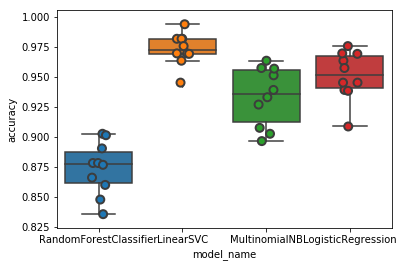

In [9]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    #SVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
cv_accuracies = validateModels(X_Select, y_Select, models, CV=10)

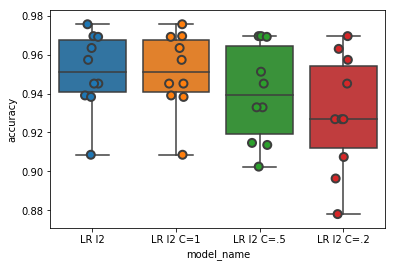

In [10]:
# conclusion: logistic regression best when penalty=l2 and C=1
models = [
    LogisticRegression(random_state=0),
    LogisticRegression(random_state=0, penalty='l2'),
    LogisticRegression(random_state=0, penalty='l2', C=.5),
    LogisticRegression(random_state=0, penalty='l2', C=.2)
]
model_names = ['LR l2','LR l2 C=1','LR l2 C=.5','LR l2 C=.2']
cv_accuracies = validateModels(X_Select, y_Select, models, model_names, CV=10)

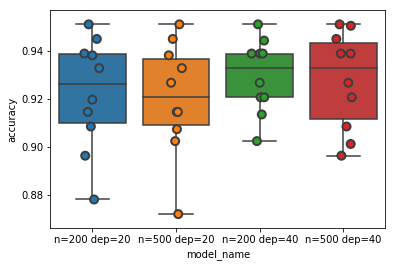

In [11]:
# random forest parameter testing
# n_estimators=200 (less variability) or 500 are similar; max_depth better 20 > 40 (greater variability than 20) > 10 > 3
from sklearn.ensemble import RandomForestClassifier
models = [
    RandomForestClassifier(n_estimators=200, max_depth=20, random_state=0),
    RandomForestClassifier(n_estimators=500, max_depth=20, random_state=0),
    RandomForestClassifier(n_estimators=200, max_depth=40, random_state=0),
    RandomForestClassifier(n_estimators=500, max_depth=40, random_state=0)
]
model_names = ['n=200 dep=20','n=500 dep=20','n=200 dep=40','n=500 dep=40']
cv_accuracies = validateModels(X_Select, y_Select, models, model_names, CV=10)

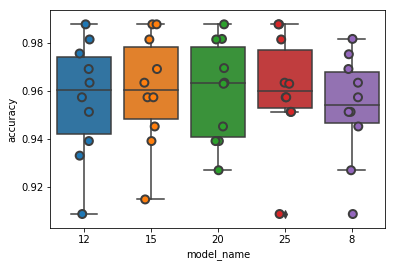

In [12]:
# K Neighbors
# 2 << 4 < 3,6 < 8,10,12 < 15, 25 with 20 better but with higher volatility than 15
from sklearn.neighbors import KNeighborsClassifier
models = [
    KNeighborsClassifier(8),
    KNeighborsClassifier(12),
    KNeighborsClassifier(15),
    KNeighborsClassifier(20),
    KNeighborsClassifier(25)
]
model_names = ['8','12','15','20','25']
cv_accuracies = validateModels(X_Select, y_Select, models, model_names, CV=10)

C:\Users\enoma1\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
C:\Users\enoma1\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
C:\Users\enoma1\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)
C:\Users\enoma1\Anaconda3\lib\site-packages\sklearn\svm\classes.py:219: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  Deprecat

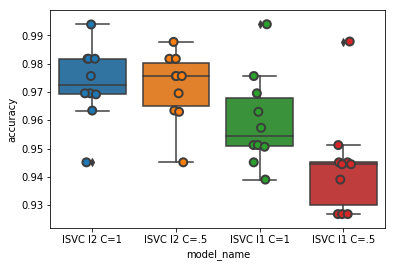

In [13]:
# linear SVC parameters
models = [
    LinearSVC(penalty='l2', C=1),
    LinearSVC(penalty='l2', C=.5),
    LinearSVC(penalty='l1', C=1, loss='l2', dual=False),
    LinearSVC(penalty='l1', C=.5, loss='l2', dual=False)
]
model_names = ['lSVC l2 C=1','lSVC l2 C=.5','lSVC l1 C=1','lSVC l1 C=.5']
cv_accuracies = validateModels(X_Select, y_Select, models, model_names, CV=10)

In [14]:
# custom scoring function for linear SVM

from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import recall_score
import pprint

scoring = {'prec_macro': 'precision_macro',
           'rec_micro': make_scorer(recall_score, average='macro')}
model = LinearSVC()
print(model)
scores = cross_validate(model, X_Select, y_Select, scoring = scoring, cv=5, return_train_score=True) #need return_train_score
pprint.pprint(scores)
      
model = LinearSVC(penalty='l1', dual=False) 
print(model)
scores = cross_validate(model, X_Select, y_Select, scoring = scoring, cv=5, return_train_score=True)

pprint.pprint(scores)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
{'fit_time': array([0.1405952 , 0.12497234, 0.11843204, 0.12581587, 0.12496614]),
 'score_time': array([0.01562142, 0.01563096, 0.01562905, 0.0156219 , 0.01562071]),
 'test_prec_macro': array([0.97300063, 0.96648076, 0.97589286, 0.96346929, 0.96939582]),
 'test_rec_micro': array([0.97256098, 0.96646341, 0.97560976, 0.96319018, 0.96932515]),
 'train_prec_macro': array([0.99771689, 0.99847561, 0.99847561, 0.99772036, 0.99847793]),
 'train_rec_micro': array([0.99770642, 0.99847095, 0.99847095, 0.99770992, 0.99847328])}
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)
{'fit_time': array([0.15621495, 0.15621471, 0.1

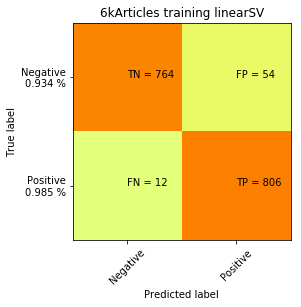

In [15]:
# linear SVC confusion matrix

from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix

model = LinearSVC(penalty='l1', dual=False)

predicted = cross_val_predict(model, X_Select, y_Select, cv=10)
confusion = metrics.confusion_matrix(y_Select, predicted) # rows are actual, columns are predicted
plotConfusionMatrix(confusion, '{} training linearSV'.format(trainingSetName))

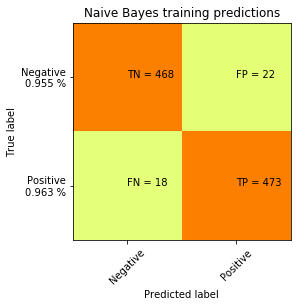

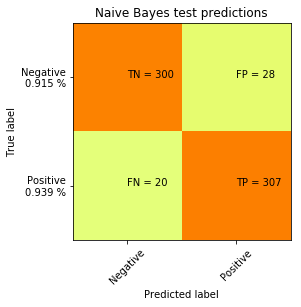

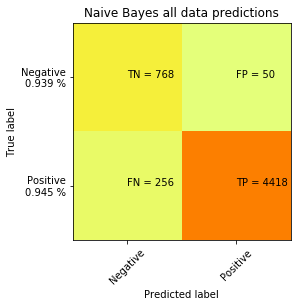


vocabulary length = 4350
   bottom coef   id        word  top coef    id       word
0    -8.985436   53        1400 -6.724614  1299    disease
1    -8.985436  121         2nd -6.722437  3483    results
2    -8.985436  124        30ch -6.706845  3871      study
3    -8.985436  149          4x -6.699908   715       cell
4    -8.985436  212     abiotic -6.676291  4102  treatment
5    -8.985436  227      acaule -6.650559  2404         lt
6    -8.985436  232   accession -6.557935   716      cells
7    -8.985436  233  accessions -6.337959  3917        sup
8    -8.985436  284         adg -6.278400  3873        sub
9    -8.985436  308      aerial -5.672867  2916   patients


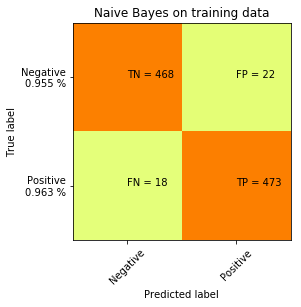

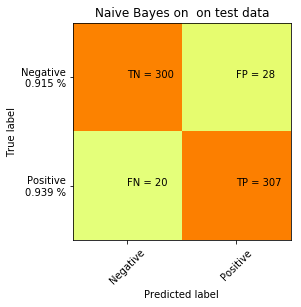

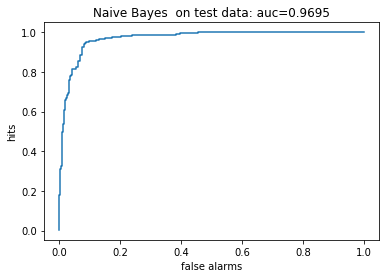

In [16]:
# #1 Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

clfNB = MultinomialNB().fit(X_train, y_train)
predicted = clfNB.predict(X_train)

confusion = metrics.confusion_matrix(labels_train, predicted) # rows are actual, columns are predicted
plotConfusionMatrix(confusion, 'Naive Bayes training predictions')

confusion = metrics.confusion_matrix(labels_test, clfNB.predict(X_test)) # rows are actual, columns are predicted
plotConfusionMatrix(confusion, 'Naive Bayes test predictions')

all_predictions = clfNB.predict(select.textToTfidfMatrix(articlesDF['articles']))
confusion = metrics.confusion_matrix(articlesDF['category'], all_predictions) # rows are actual, columns are predicted
plotConfusionMatrix(confusion, 'Naive Bayes all data predictions')

print("\nvocabulary length = " + str(len(select.vocabulary())))

showMostDiagnosticWords(select, clfNB)   #plotProbErrorDist(clf, X_test, y_test)
roc = displayModelStats(clfNB, X_train, y_train, X_test, y_test, 'Naive Bayes')

import pickle
pickle.dump([clfNB, select], open('NBmodelFrom{}.pickle'.format(trainingSetName),'wb'))

   bottom coef    id         word   top coef    id        word
0   -36.250136  3061       potato   2.604099   610       blood
1   -20.812483  1942  homeopathic   2.821914  1589  expression
2   -14.046001  3011      players   2.962427   685        care
3   -11.509451  1943   homeopathy   3.149718  2733       novel
4   -10.179025  3758      species   3.679821   716       cells
5    -8.373472  3851       stream   4.072824  1897      health
6    -7.711881  1876      habitat   5.586134  3214     protein
7    -7.388439  1723     football   8.155336  2915     patient
8    -6.017245  3719       soccer  12.793266  2404          lt
9    -4.815907   552         beam  13.742465  2916    patients


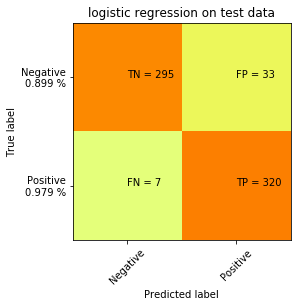

In [17]:
# #2 logistic Regression 

from sklearn import preprocessing
from sklearn.svm import SVC
import numpy as np
import math
from classificationFunctions import *  

clfLR = LogisticRegression(C=2, penalty='l1').fit(X_train, y_train) 
predicted = clfLR.predict(X_test)
showMostDiagnosticWords(select, clfLR)   #plotProbErrorDist(clf, X_test, y_test)

confusion = metrics.confusion_matrix(y_test, predicted) # rows are actual, columns are predicted
plotConfusionMatrix(confusion, 'logistic regression on test data')

import pickle
pickle.dump([clfLR, select], open('LRmodelFrom{}.pickle'.format(trainingSetName),'wb'))

   bottom coef    id         word  top coef    id      word
0    -2.301824  3061       potato  0.696850   309   aerosol
1    -2.207616  1942  homeopathic  0.729271  2517       men
2    -1.857411  1943   homeopathy  0.730294   716     cells
3    -1.522141  3011      players  0.743330  2501   medical
4    -1.433197  1723     football  0.813825   685      care
5    -1.230648  3758      species  0.822779  3879  subjects
6    -1.057388  3719       soccer  0.867310  3214   protein
7    -1.028671  3062     potatoes  0.943239  2915   patient
8    -0.936891   552         beam  1.243959  2404        lt
9    -0.865935  3245          pvy  1.556949  2916  patients


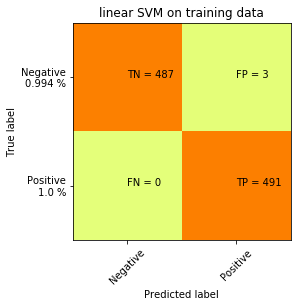

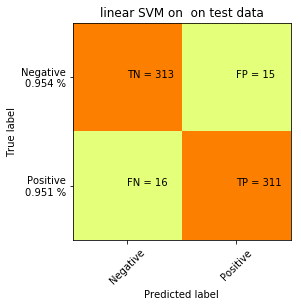

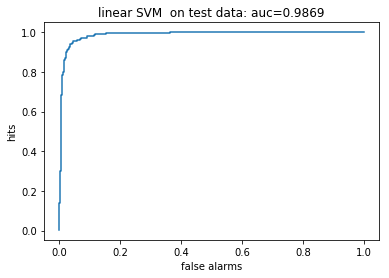

In [18]:
# #3 linear SVM model

from sklearn.svm import LinearSVC

clfSVC = LinearSVC().fit(X_train, y_train) # LinearSVC(penalty='l2', C=1)

showMostDiagnosticWords(select, clfSVC)   #plotProbErrorDist(clf, X_test, y_test)
roc = displayModelStats(clfSVC, X_train, y_train, X_test, y_test, 'linear SVM')

import pickle
pickle.dump([clfSVC, select], open('SVCmodelFrom{}.pickle'.format(trainingSetName),'wb'))

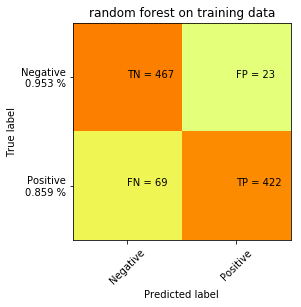

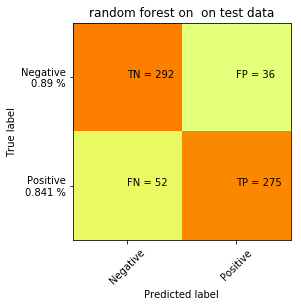

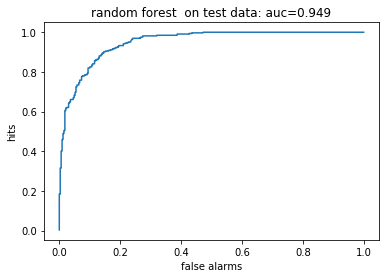

In [19]:
# #4 Random Forest model

from sklearn.ensemble import RandomForestClassifier

clfRF = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0).fit(X_train, y_train) 

#showMostDiagnosticWords(select, clfRF)   #plotProbErrorDist(clf, X_test, y_test)
roc = displayModelStats(clfRF, X_train, y_train, X_test, y_test, 'random forest')

import pickle
pickle.dump([clfRF, select], open('RFmodelFrom{}.pickle'.format(trainingSetName),'wb'))

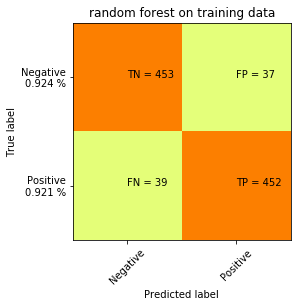

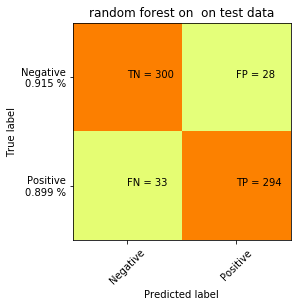

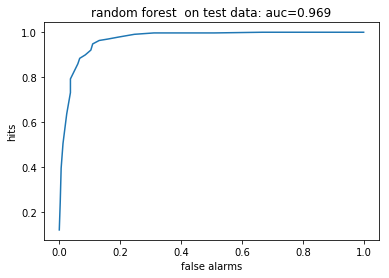

In [20]:
# #5 K Neighbors

from sklearn.neighbors import KNeighborsClassifier

clfKN = KNeighborsClassifier(20).fit(X_train, y_train) 

#showMostDiagnosticWords(select, clfKN)   #plotProbErrorDist(clf, X_test, y_test)
roc = displayModelStats(clfKN, X_train, y_train, X_test, y_test, 'random forest')

import pickle
pickle.dump([clfKN, select], open('KNmodelFrom{}.pickle'.format(trainingSetName),'wb'))

In [21]:
# list important features used by the random forest

invertedVocabList = dict([[i,w] for w,i in select.vocabulary().items()])
wordImportance = [[invertedVocabList[i],x,i] for i,x in enumerate(list(clfRF.feature_importances_)) if x != 0]
wordImportance = sorted(wordImportance, key=lambda word: word[1], reverse=True)
print(len(wordImportance))
pprint.pprint(wordImportance[:10])

511
[['tubers', 0.03278604556056168, 4117],
 ['patients', 0.027233274259211005, 2916],
 ['potato', 0.02679161489840911, 3061],
 ['background', 0.02375596919149835, 531],
 ['tuber', 0.02355918411074185, 4115],
 ['methods', 0.0229801398566908, 2538],
 ['cultivars', 0.02177173937836688, 1079],
 ['conclusion', 0.018007291570906928, 921],
 ['field', 0.01592527995824876, 1670],
 ['lt', 0.015479271470338894, 2404]]


In [22]:
print(clfRF.apply(X_test))
print(clfRF.apply(X_train).shape)
print(clfRF.apply(X_test).shape)
print(list(clfRF.apply(X_train)[0]))
len(X_train.todense())

[[10  3  3 ... 12  3 10]
 [12  3  3 ... 11  6  3]
 [12  3  8 ... 12  6  6]
 ...
 [10  3  3 ... 12  6  3]
 [ 3  3  3 ...  3  3  3]
 [ 3  3  4 ...  3  3  3]]
(981, 200)
(655, 200)
[3, 3, 3, 3, 3, 3, 3, 5, 3, 4, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 6, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 9, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 11, 10, 3, 5, 3, 3, 3, 10, 3, 8, 4, 3, 3, 3, 3, 3, 10, 3, 3, 3, 3, 5, 3, 3, 3, 6, 3, 6, 3, 3, 3, 3, 3, 3, 3, 4, 5, 3, 3, 6, 12, 6, 3, 3, 4, 8, 5, 3, 3, 3, 4, 3, 3, 3, 6, 3, 4, 5, 3, 3, 4, 3, 3, 3, 8, 3, 3, 3, 6, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 10, 3, 6, 4, 3, 3, 3, 3, 3, 5, 3, 4, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 10, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 4, 6, 3, 3, 3, 10, 4, 8, 3, 3, 3, 3, 3, 3, 8, 3, 3, 3, 3, 6, 3, 3, 4, 3, 3, 3, 8, 3, 3, 3, 8, 3, 3, 3, 3, 6]


981

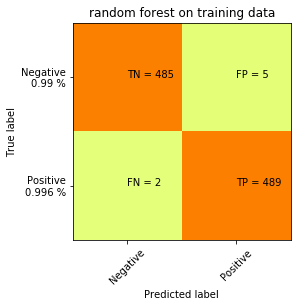

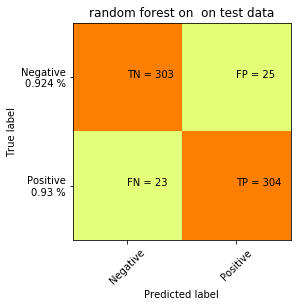

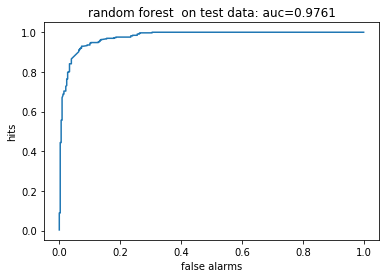

In [23]:
# #4 AdaBoost model

from sklearn.ensemble import AdaBoostClassifier

clfAB = AdaBoostClassifier().fit(X_train, y_train) 

#showMostDiagnosticWords(select, clfAB)   #plotProbErrorDist(clf, X_test, y_test)
roc = displayModelStats(clfAB, X_train, y_train, X_test, y_test, 'random forest')

import pickle
pickle.dump([clfAB, select], open('ABmodelFrom{}.pickle'.format(trainingSetName),'wb'))


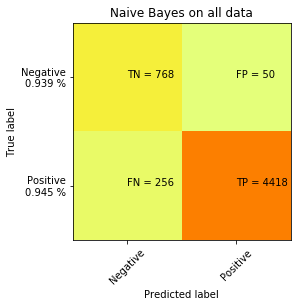

In [24]:
# run model on full data set

X_all, y_all = select.textToTfidfMatrix(articlesDF['articles']), articlesDF['category']
predicted, title = clfNB.predict(X_all), 'Naive Bayes'
#predictProb = clf.predict_proba(X_all)

confusion = metrics.confusion_matrix(y_all, predicted) # rows are actual, columns are predicted
plotConfusionMatrix(confusion, title + ' on all data')

In [25]:
# get test of misclassified articles

def getErrors(articlesDF, y_all, predicted):
    observed = articlesDF['category'].iloc[::].values
    articleList = articlesDF['articles'].iloc[::].values

    misses = articleList[[i for i in range(len(predicted)) if (y_all[i] == 1) & (predicted[i] == 0)]]
    falseAlarms = articleList[[i for i in range(len(predicted)) if (y_all[i] == 0) & (predicted[i] == 1)]]
    return misses, falseAlarms

misses, falseAlarms = getErrors(articlesDF, list(y_all), predicted)
print('{} misses and {} false alarms out of {} articles'.format(len(misses), len(falseAlarms),len(y_all)))
falseAlarms[2]

256 misses and 50 false alarms out of 5492 articles


'Abstract not available'

In [26]:
articlesDFall = articlesDF.copy()
articlesDFall.reindex()
articlesDFall.iloc[:9]

articles  category
0  Background: Immune checkpoint inhibitor (ICI) ...         1
1  Background: Denosumab (Dmab) is a potent RANK ...         1
2  Background: Identification of targeted therapi...         1
3  Background: The PI3K/AKT/ mTOR pathway may pla...         1
4  Background: Lymph node status (LNS) drives pro...         1
5  Background: While influenza A and B cause annu...         1
6  Background: Supplementation of mesenchymal ste...         1
7  Matched vs. Mismatched Gender and Lecture Type...         1
8  In baseball, home plate umpires' perceptual-co...         1

In [27]:
missingAbstracts = [[i,x] for (i,x) in enumerate(articlesDFall['articles']) if len(x) < 100]
goodAbstracts = [[i,x] for (i,x) in enumerate(articlesDFall['articles']) if len(x) >= 100]
print('{} missing abstracts out of a {} abstracts'.format(len(missingAbstracts), len(articlesDFall)))
missingAbstracts

43 missing abstracts out of a 5492 abstracts


[[832, 'Abstract not available.'],
 [1392, 'Abstract not available.'],
 [2014, 'Abstract not available.'],
 [2016, 'Abstract not available.'],
 [2017, 'Abstract not available.'],
 [2018, 'Abstract not available.'],
 [2087, 'Abstract not available.'],
 [2173, 'Abstract not available.'],
 [2190, 'Abstract not available.'],
 [2213, 'Abstract not available.'],
 [2257, 'Abstract not available.'],
 [2271, 'Abstract not available.'],
 [2362, 'Abstract not available.'],
 [2535, 'Abstract not available.'],
 [2646, 'Abstract not available.'],
 [2647, 'Abstract not available.'],
 [2650, 'Abstract not available.'],
 [2687, 'Abstract not available.'],
 [2771, 'Abstract not available.'],
 [2772, 'Abstract not available.'],
 [2814, 'Abstract not available.'],
 [2815, 'Abstract not available.'],
 [2964, 'Abstract not available.'],
 [3034, 'Abstract not available.'],
 [3183, 'Abstract not available.'],
 [3430, 'Abstract not available.'],
 [3816, 'Abstract not available.'],
 [3826, 'Abstract not availab

In [28]:
# article rated as medical from 6k of articles

ma = [articlesDFall.iloc[x[0]] for x in goodAbstracts]
list(pd.DataFrame(ma)[8:9]['articles'])

["In baseball, home plate umpires' perceptual-cognitive skills are tested with each pitch as they are required to judge, with accuracy, whether the ball passed through the imaginary region above home plate known as the strike zone. Home plate umpires must visually track the flight of a pitched ball as it leaves the pitcher's hand and travels over the home plate region to accurately determine whether a pitch should be called a strike or a ball. Among other variables influencing umpire decision making ability, the location of the pitch is of particular importance as pitchers routinely work to avoid the regions nearest home plate while favoring peripheral regions. This current study applied literature related to judgment and decision making among expert sport performers to the professional baseball umpire population. Using a Rasch model, we estimated expert baseball umpires' ball/strike decision making ability and difficulty over the course of the 2015-2017 regular and postseasons. Pitch 

In [29]:
articlesDFall.iloc[1]

articles    Background: Denosumab (Dmab) is a potent RANK ...
category                                                    1
Name: 1, dtype: object

In [30]:
df_9k_articles = read6kArticles('GoodBadAbstractTrainingSetV2.0.xlsx')
df_9k_articles[:3]

Abstract Body AbstractNumber  \
0  Background: Immune checkpoint inhibitor (ICI) ...        TPS3120   
1  Background: Denosumab (Dmab) is a potent RANK ...            501   
2  Background: Identification of targeted therapi...        TPS1114   

                                        Affiliations Authors  \
0  The University of Texas MD Anderson Cancer Cen...     NaN   
1  1) University of Sheffield, Weston Park Hospit...     NaN   
2                                                NaN     NaN   

                                            Authors  Date Pub/Pres   End Date  \
0  Heymach, John; Thomas, Michael; Besse, Benjami...    2018-06-01 2018-06-05   
1  Coleman, Robert E.(1); Finkelstein, Dianne(2);...    2018-06-01 2018-06-05   
2  De La Haba, Juan; Guerrero-Zotano, Angel; Alej...    2018-06-01 2018-06-05   

                                  Journal/Conference          Location  \
0  2018 Annual Meeting of the American Society of...  Chicago, IL; USA   
1  2018 Annual Meeting of the American Society of...  Chicago, IL; USA   
2  2018 Annual Meeting of the American Society of...  Chicago, IL; USA   

   Presentation ID  Proceeding ID  \
0         23467513         302960   
1         23469127         302960   
2         23468698         302960   

                                               Title  good  
0  An open-label, multidrug, biomarker-directed, ...     1  
1  Adjuvant denosumab in early breast cancer: Fir...     1  
2  A phase II clinical trial to analyze olaparib ...     1

   bottom coef    id         word  top coef    id      word
0    -2.301824  3061       potato  0.696850   309   aerosol
1    -2.207616  1942  homeopathic  0.729271  2517       men
2    -1.857411  1943   homeopathy  0.730294   716     cells
3    -1.522141  3011      players  0.743330  2501   medical
4    -1.433197  1723     football  0.813825   685      care
5    -1.230648  3758      species  0.822779  3879  subjects
6    -1.057388  3719       soccer  0.867310  3214   protein
7    -1.028671  3062     potatoes  0.943239  2915   patient
8    -0.936891   552         beam  1.243959  2404        lt
9    -0.865935  3245          pvy  1.556949  2916  patients


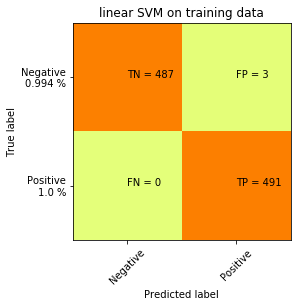

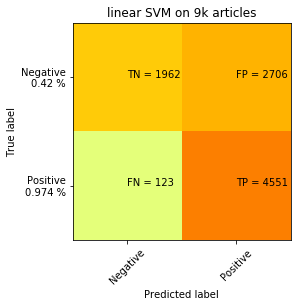

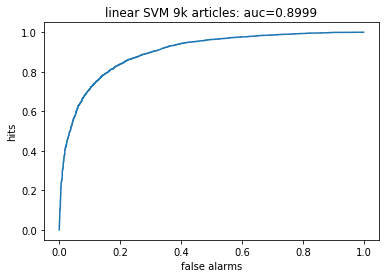

In [31]:
X_9k_articles, y_9k_actual = select.textToTfidfMatrix(df_9k_articles['Abstract Body']), df_9k_articles['good']

showMostDiagnosticWords(select, clfSVC)   #plotProbErrorDist(clf, X_test, y_test)
roc = displayModelStats(clfSVC, X_train, y_train, X_9k_articles, y_9k_actual, 'linear SVM', '9k articles')

   bottom coef   id        word  top coef    id       word
0    -8.985436   53        1400 -6.724614  1299    disease
1    -8.985436  121         2nd -6.722437  3483    results
2    -8.985436  124        30ch -6.706845  3871      study
3    -8.985436  149          4x -6.699908   715       cell
4    -8.985436  212     abiotic -6.676291  4102  treatment
5    -8.985436  227      acaule -6.650559  2404         lt
6    -8.985436  232   accession -6.557935   716      cells
7    -8.985436  233  accessions -6.337959  3917        sup
8    -8.985436  284         adg -6.278400  3873        sub
9    -8.985436  308      aerial -5.672867  2916   patients


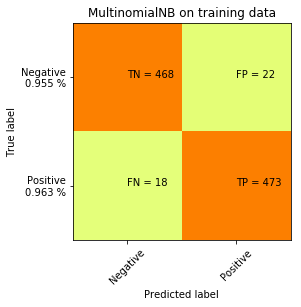

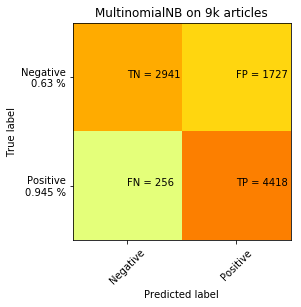

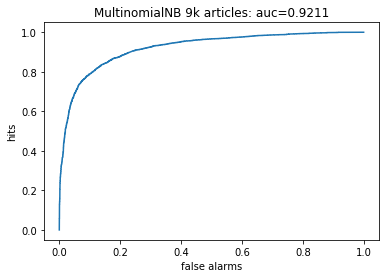

In [32]:
showMostDiagnosticWords(select, clfNB)   #plotProbErrorDist(clf, X_test, y_test)
rocNB = displayModelStats(clfNB, X_train, y_train, X_9k_articles, y_9k_actual, clfNB.__class__.__name__, '9k articles')

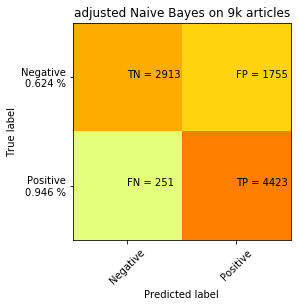

In [33]:
def bestDecisionPoint(roc, w0=1, w1=1):  # find the best point on the ROC curve based on weighted sum of corrects
    maxsum = (1 - roc[0][0])*w0 + roc[1][0]*w1
    for i,x in enumerate((1 - roc[0])*w0 + roc[1]*w1):
        if x > maxsum:
            maxsum = x
            ibest = i
    return ibest


decisionCutoff = roc[2][bestDecisionPoint(rocNB, 1, 1)]
predictNB1 = list(map(lambda x: 1 if x > decisionCutoff else 0, getDecision_function_values(clfNB, X_9k_articles)))
plotConfusionMatrix(metrics.confusion_matrix(y_9k_actual, predictNB1), 'adjusted Naive Bayes on 9k articles')


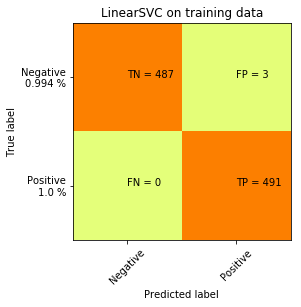

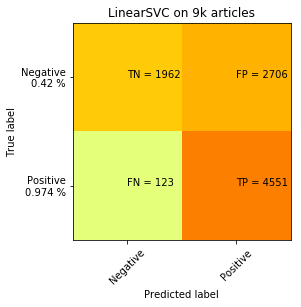

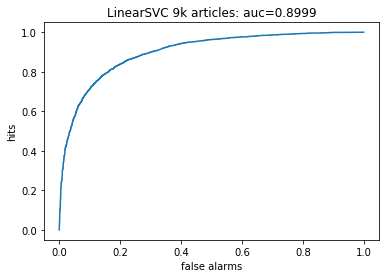

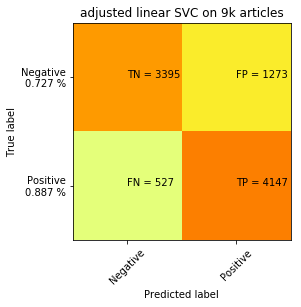

In [34]:
rocSVC = displayModelStats(clfSVC, X_train, y_train, X_9k_articles, y_9k_actual, clfSVC.__class__.__name__, '9k articles')
decisionCutoff = roc[2][bestDecisionPoint(rocSVC, 1, 2)]
predictSVC1 = list(map(lambda x: 1 if x > decisionCutoff else 0, getDecision_function_values(clfSVC, X_9k_articles)))
plotConfusionMatrix(metrics.confusion_matrix(y_9k_actual, predictSVC1), 'adjusted linear SVC on 9k articles')

In [35]:
'''import matplotlib.pyplot as plt

plt.plot(roc[0],roc[1])
plt.plot(roc[0][ibest], roc[1][ibest], 'ro')
plt.show()
'''

"import matplotlib.pyplot as plt\n\nplt.plot(roc[0],roc[1])\nplt.plot(roc[0][ibest], roc[1][ibest], 'ro')\nplt.show()\n"

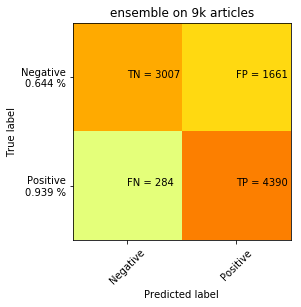

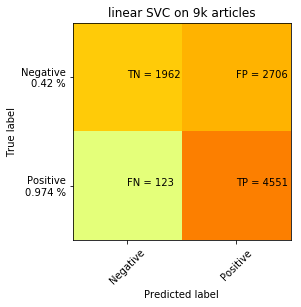

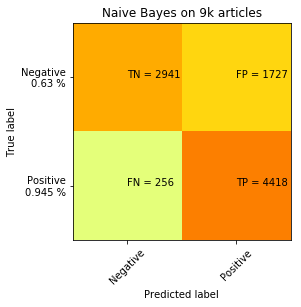

In [36]:
#ensemble model

import numpy as np
multiplePredictions = np.column_stack([clfSVC.predict(X_9k_articles), clfNB.predict(X_9k_articles)])
ensemblePrediction = np.min(multiplePredictions, axis=1)

plotConfusionMatrix(metrics.confusion_matrix(y_9k_actual, ensemblePrediction), 'ensemble on 9k articles')
plotConfusionMatrix(metrics.confusion_matrix(y_9k_actual, clfSVC.predict(X_9k_articles)), 'linear SVC on 9k articles')
plotConfusionMatrix(metrics.confusion_matrix(y_9k_actual, clfNB.predict(X_9k_articles)), 'Naive Bayes on 9k articles')
#roc = plotROC(X_test, y_test, clf, title + ' ' + title2, getDecision_function_values(clf, X_test))

In [37]:
import pdfkit
weights = getWordWeights(clfNB, select)
weights[-20:]

[(-6.972315071546481, 1897, 'health'),
 (-6.969288664007562, 1589, 'expression'),
 (-6.9396024954385815, 2538, 'methods'),
 (-6.929172062139326, 4180, 'using'),
 (-6.928820801003841, 669, 'cancer'),
 (-6.8915422843604945, 320, 'age'),
 (-6.806629003571951, 800, 'clinical'),
 (-6.799177731139904, 1859, 'group'),
 (-6.771311600128117, 4259, 'vs'),
 (-6.736857528143277, 2915, 'patient'),
 (-6.724614158686023, 1299, 'disease'),
 (-6.722436913714113, 3483, 'results'),
 (-6.706844578835952, 3871, 'study'),
 (-6.699907891684951, 715, 'cell'),
 (-6.676290654020411, 4102, 'treatment'),
 (-6.650558600799657, 2404, 'lt'),
 (-6.55793537245037, 716, 'cells'),
 (-6.337958550317994, 3917, 'sup'),
 (-6.278400423618525, 3873, 'sub'),
 (-5.672866911864832, 2916, 'patients')]

In [38]:
import numpy, pdfkit
text = '''<!DOCTYPE html> 
<html> 
<style> 
.top{ width:50%; margin:20px auto;}
table { width: 100%; table-layout: fixed; text-align: center;} 
h2 { text-align: center; }
.words { margin-left: 10px; margin-right: 10px; }
</style> 
<body> 
<br>
<img src="<dir>/chosen-TRG_Logo_yellowx350.png" alt="TheRehinkGroup extended logo" style="width:350px;height:60px;">
'''
config = pdfkit.configuration(wkhtmltopdf='c:/Program Files/wkhtmltopdf/bin/wkhtmltopdf.exe')
pdfkit.from_string(text, 'test.pdf', configuration=config)


OSError: No wkhtmltopdf executable found: "c:/Program Files/wkhtmltopdf/bin/wkhtmltopdf.exe"
If this file exists please check that this process can read it. Otherwise please install wkhtmltopdf - https://github.com/JazzCore/python-pdfkit/wiki/Installing-wkhtmltopdf

In [ ]:
####################################################
# read hand classified APS 2000 sample

import pandas

#aps2000 = pandas.read_excel('Sample_APSData.xlsx', sheet_name="Sheet1")
#APS_articles = pandas.read_excel('Preliminary_Classified_APSSampleData.xlsx', sheet_name="Sheet1")
APS_articles_final = pandas.read_csv('url_abstracts_final.csv')
APS_articles_final[:5]

In [ ]:
# add exploded URLs
import pprint
'''[' http:~~meetings.aps.org~Meeting~MAR11~Session~H40.6 ',
 ' http:~~meetings.aps.org~Meeting~MAR16~Session~R55.4 ',
 ' http:~~meetings.aps.org~Meeting~MAR18~Session~G60.217 ',
 ' http:~~meetings.aps.org~Meeting~MAR18~Session~V50.3 ',
 ' http:~~meetings.aps.org~Meeting~MAR06~Session~Z26.15 ',
 ' http:~~meetings.aps.org~Meeting~DFD15~Session~L23?showAbstract ',
'''
pprint.pprint([[i,x] for i,x in enumerate(list(APS_articles_final['URL'])) if len(str(x).split("Meeting~")) != 2])

In [ ]:
#######################################
def decomposeURL(u):
    try:
        x = str(u).split("Meeting~")[1].split("~Session~")
        return [x[0][:3], x[0][3:], x[1][:1], x[1][1:3], x[1][3:]]
    except:
        return [0,0,0,0,0]

In [ ]:
i = 0
print(list(APS_articles_final['URL'])[i])
print(decomposeURL(list(APS_articles_final['URL'])[i]))

explodedURL = [decomposeURL(x) for x in list(APS_articles_final['URL'])]
explodedURLdf = pd.DataFrame(explodedURL, columns=['month','year','category','group','subgroup'], index=APS_articles_final.index)
APS_articles = pd.concat([explodedURLdf, APS_articles_final], axis=1)
APS_articles

In [ ]:
import pickle
##### pickle.dump([clfNB, select], open('NBmodelFrom6kArticles.pickle','wb'))

In [ ]:
# 2000 randomly sampled articles from APS.org

X_aps2000 = select.textToTfidfMatrix(APS_articles['Contents'])
APS_predict = clfNB.predict(X_aps2000)
print('{} signals out of the set of {} articles'.format(sum(APS_predict),len(APS_predict)))

X_APS_articles, y_APS_actual = select.textToTfidfMatrix(APS_articles['Contents']), APS_articles['Relevant/Non-Relevant']
APS_predictedProb = clf.predict_proba(X_APS_articles)

showMostDiagnosticWords(select, clfSVC)   #plotProbErrorDist(clf, X_test, y_test)
roc = displayModelStats(clfSVC, X_train, y_train, X_APS_articles, y_APS_actual, 'linear SVM', 'APS articles')

In [ ]:
showMostDiagnosticWords(select, clfNB)   #plotProbErrorDist(clf, X_test, y_test)
rocNB = displayModelStats(clfNB, X_train, y_train, X_APS_articles, y_APS_actual, clfNB.__class__.__name__, 'APS articles')

In [ ]:
#ensemble model

import numpy as np
multiplePredictions = np.column_stack([clfSVC.predict(X_APS_articles), clfNB.predict(X_APS_articles)])
ensemblePrediction = np.min(multiplePredictions, axis=1)

plotConfusionMatrix(metrics.confusion_matrix(y_APS_actual, clfSVC.predict(X_APS_articles)), 'linear SVC on APS articles')
plotConfusionMatrix(metrics.confusion_matrix(y_APS_actual, clfNB.predict(X_APS_articles)), 'Naive Bayes on APS articles')
plotConfusionMatrix(metrics.confusion_matrix(y_APS_actual, ensemblePrediction), 'ensemble on APS articles')

In [ ]:
# get test of misclassified articles
# APS_articles['Contents']), APS_articles['Relevant/Non-Relevant']

def getErrors(y_all, predicted):
    misses = [i for i in range(len(predicted)) if (y_all[i] == 1) & (predicted[i] == 0)]
    falseAlarms = [i for i in range(len(predicted)) if (y_all[i] == 0) & (predicted[i] == 1)]
    return misses, falseAlarms

missesId, falseAlarmsId = getErrors(y_APS_actual, ensemblePrediction)
print('{} misses and {} false alarms out of {} articles'.format(len(missesId), len(falseAlarmsId),len(y_all)))

falseAlarms = APS_articles.iloc[[x for x in falseAlarmsId]]
misses = APS_articles.iloc[[x for x in missesId]]
FApredictedProb = APS_predictProb[falseAlarmsId]

In [ ]:
misses['Contents'].iloc[0]

In [ ]:
# number of vocabulary matches for each of the 354 false alarms

FAlengths = [len([w for w in weights if (' ' + x.lower() + ' ').find(' '+ list(w)[2].lower() + ' ') > 0]) for x in falseAlarms['Contents']]
print(FAlengths)
print('{} of the {} false alarms contain no words from the vocabulary'.format(len([x for x in FAlengths if x <= 10]), len(FAlengths)))

In [ ]:
# sum of tfidf values for 354 false alarms
tfidfSumsByArticle = np.sum(X_APS_articles.todense(), axis=1).tolist()
wordCountByArticle = [sum([1 for x in x1.tolist()[0] if x != 0]) for x1 in X_APS_articles.todense()]

In [ ]:
FAwordCount = [wordCountByArticle[i] for i in falseAlarmsId]
MissedWordCount = [wordCountByArticle[i] for i in missesId]

import matplotlib.pyplot as plt
plt.hist(FAwordCount,40)
plt.title('APS 2000 article false alarms')
plt.ylabel('vocabulary words per article')
plt.show()

import matplotlib.pyplot as plt
plt.hist(MissedWordCount,40)
plt.title('APS 2000 article misses')
plt.ylabel('vocabulary words per article')
plt.show()

import matplotlib.pyplot as plt
plt.hist(wordCountByArticle,40)
plt.title('APS 2000 article sample')
plt.ylabel('vocabulary words per article')
plt.show()

In [ ]:
missesId

In [ ]:
invertedVocabList = dict([[i,w] for w,i in select.vocabulary().items()])

# word matches to the vocabulary for a single article
aNumber = 6
id = falseAlarmsId[aNumber]
wordMatches0 = [[id,i,x,clfNB.coef_[0][i], invertedVocabList[i]] for i,x in enumerate(X_APS_articles.todense()[id].tolist()[0]) if x != 0]
wordMatches = pd.DataFrame(wordMatches0, columns=['abstractId','vocabNumber','tfidfWeight','modelCoef','Token'])
print(wordMatches)

print(APS_articles.iloc[id])
APS_articles.iloc[id]['Contents']